In [ ]:
# %%capture
# This cell will take time
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.2/310.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: unsloth 2024.11.6
Uninstalling unsloth-2024.11.6:
  Successfully uninstalled unsloth-2024.11.6
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-d01te8og/unsloth_b9e02657c72541318fb0c7c343f95d6a
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-d01te8og/unsloth_b9e02657c72541318fb0c7c343f95d6a
  Resolved https://github.com/unslothai/unsloth.git to commit d8ff860c842095f4729fdd1d5aedf567a9e2c4da
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.11.6-py3-none-any.whl size=161268 sha256=4b85158cefe822e4c9c6446449f3aa897c3fc6373a6981713fce5a1f5b155483
  Stored in directory: /tmp/pip-ephem-wheel-cache-isv8ss6u/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [ ]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 1024 # Choose any
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+ 
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [ ]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Meta-Llama-3.1-8B",
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit,
)

==((====))==  Unsloth 2024.11.6: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu124. CUDA = 8.0. CUDA Toolkit = 12.4.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r=8,  # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],
    lora_alpha=16,
    lora_dropout=0, # Supports any, but = 0 is optimized
    bias="none", # Supports any, but = "none" is optimized    
    
    use_gradient_checkpointing="unsloth", # True or "unsloth" for very long context
    random_state=3407, 
    use_rslora=False, # We support rank stabilized LoRA
    loftq_config=None, # And LoftQ
)

Unsloth 2024.11.6 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
# download and load competition dataset
from datasets import load_dataset, DatasetDict

# print and see dataset
dataset = load_dataset("ad6398/nyu-dl-teach-maths-comp")

README.md:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'is_correct', 'answer', 'solution'],
        num_rows: 1000000
    })
    test: Dataset({
        features: ['question', 'is_correct', 'answer', 'solution'],
        num_rows: 10000
    })
})

In [ ]:
# Randomly sample 35,000 data points from the training dataset
sample_size = 35000
train_dataset_full = dataset['train'] 
train_dataset_sampled = train_dataset_full.shuffle(seed=42).select(range(sample_size))

In [8]:
# Split into training and validation sets (90% train, 10% validation)
train_valid_split = train_dataset_sampled.train_test_split(test_size=0.1, seed=42)
train_dataset = train_valid_split['train']
valid_dataset = train_valid_split['test']

In [ ]:
prompt = """You are a highly accurate mathematical evaluator. Your sole task is to determine whether a given answer to a math question is correct or not. Respond strictly with 'True' if the answer is correct, and 'False' if it is incorrect. Do not provide any additional text or explanations.

### Question:
{}

### Answer:
{}

### Output:
{}
"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN


def formatting_prompts_func(examples):
    question = examples["question"]
    ans = examples["answer"]
    output = examples["is_correct"]
    texts = []
    for instruction, input_text, output_text in zip(question, ans, output):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = prompt.format(instruction, input_text, output_text) + EOS_TOKEN
        texts.append(text)
    return {"text": texts}

In [ ]:
train_dataset = train_dataset.map(formatting_prompts_func, batched=True)
valid_dataset = valid_dataset.map(formatting_prompts_func, batched=True)

Map:   0%|          | 0/31500 [00:00<?, ? examples/s]

Map:   0%|          | 0/3500 [00:00<?, ? examples/s]

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

training_args = TrainingArguments(
    per_device_train_batch_size=6,
    gradient_accumulation_steps=6,
    warmup_steps=1000,             
    num_train_epochs=9, # Set this for 1 full training run.          
    # max_steps=400,             
    learning_rate=5e-6,           
    fp16=not is_bfloat16_supported(),
    bf16=is_bfloat16_supported(),
    logging_steps=100,            
    optim="adamw_torch",          
    weight_decay=0.01,
    lr_scheduler_type="linear",
    seed=3407,
    max_grad_norm=1.0,
    output_dir="outputs",
    report_to="none", # Use this for WandB etc            
)

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=1,           
    packing=False, # Can make training 5x faster for short sequences.              
    args=training_args
)






Map:   0%|          | 0/31500 [00:00<?, ? examples/s]

In [13]:
print(f"Number of training examples: {len(train_dataset)}")
print(f"Number of validation examples: {len(valid_dataset)}")
print(f"Sample text: {train_dataset['text'][0]}")

Number of training examples: 31500
Number of validation examples: 3500
Sample text: You are a highly accurate mathematical evaluator. Your sole task is to determine whether a given answer to a math question is correct or not. Respond strictly with 'True' if the answer is correct, and 'False' if it is incorrect. Do not provide any additional text or explanations.

### Question:
If there were 200 students who passed an English course three years ago, and each subsequent year until the current one that number increased by 50% of the previous year's number, how many students will pass the course this year?

### Answer:
450

### Output:
False
<|end_of_text|>


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 31,500 | Num Epochs = 9
O^O/ \_/ \    Batch size per device = 6 | Gradient Accumulation steps = 6
\        /    Total batch size = 36 | Total steps = 7,875
 "-____-"     Number of trainable parameters = 20,971,520


Step,Training Loss
100,2.023100
200,1.979300
300,1.725900
400,1.135600
500,0.873400
600,0.793400
700,0.779200
800,0.755400
900,0.745300
1000,0.728000


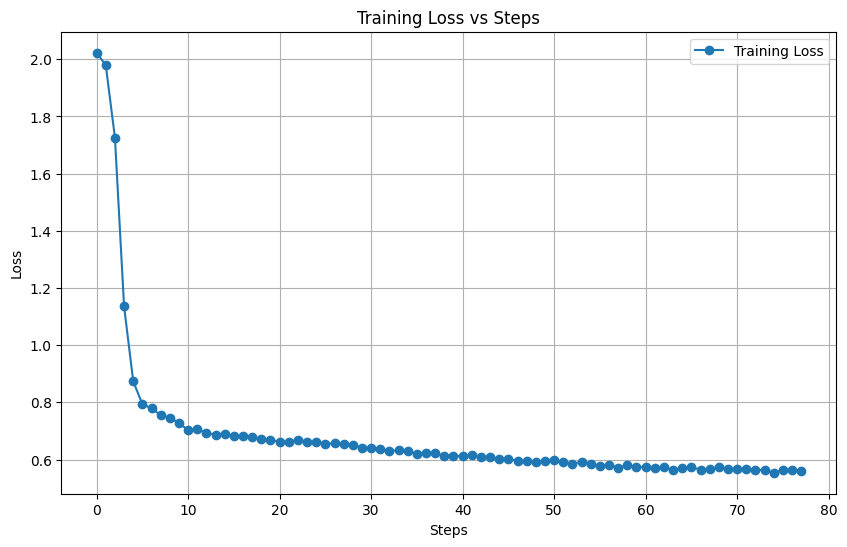

In [ ]:
import matplotlib.pyplot as plt

trainer_stats = trainer.train()

log_history = trainer.state.log_history

training_loss = [log['loss'] for log in log_history if 'loss' in log]
steps = [i for i in range(len(training_loss))]

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, label='Training Loss', marker='o')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss vs Steps')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Sample inferene data point
test_dataset = dataset['test']

sample_ques = test_dataset['question'][0]
sample_ans = test_dataset['answer'][0]

In [ ]:
# Running inference on single test
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
input_prompt = prompt.format(
        sample_ques, # ques
        sample_ans, # given answer
        "", # output - leave this blank for generation! LLM willl generate is it is True or False
    )

print("Input Promt:\n", input_prompt)
inputs = tokenizer(
[
    input_prompt
], return_tensors = "pt").to("cuda")

input_shape = inputs['input_ids'].shape
input_token_len = input_shape[1]  # 1 because of batch
outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
# you can get the whole generated text by uncommenting the below line
# text_generated = tokenizer.batch_decode([outputs, skip_special_tokens=True)

response = tokenizer.batch_decode([outputs[0][input_token_len:]], skip_special_tokens=True)
response

Input Promt:
 You are a highly accurate mathematical evaluator. Your sole task is to determine whether a given answer to a math question is correct or not. Respond strictly with 'True' if the answer is correct, and 'False' if it is incorrect. Do not provide any additional text or explanations.

### Question:
The Parker family needs to leave the house by 5 pm for a dinner party. Mrs. Parker was waiting to get into the bathroom at 2:30 pm. Her oldest daughter used the bathroom for 45 minutes and her youngest daughter used the bathroom for another 30 minutes. Then her husband used it for 20 minutes. How much time will Mrs. Parker have to use the bathroom to leave on time?

### Answer:
205

### Output:




['True\n']

In [ ]:
from tqdm import tqdm 
import pandas as pd

batch_size = 16
predictions = []

tokenizer.padding_side = 'left'

total_predictions = len(test_dataset)

for start_idx in tqdm(range(0, total_predictions, batch_size)):
    end_idx = min(start_idx + batch_size, total_predictions)

    batch_questions = test_dataset["question"][start_idx:end_idx]
    batch_answers = test_dataset["answer"][start_idx:end_idx]

    input_prompts = [
        prompt.format(question, answer, "") for question, answer in zip(batch_questions, batch_answers)
    ]

    inputs = tokenizer(
        input_prompts,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=max_seq_length 
    ).to(device)  

    # Generate predictions for the batch
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=64,
            use_cache=True,
            do_sample=False,
            num_beams=1,
            early_stopping=True
        )

    responses = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    # Extract predictions and capitalize the first letter
    for response in responses:
        model_prediction = response.split("### Output:")[-1].strip().split()[0].capitalize()
        if model_prediction not in ['True', 'False']:
            model_prediction = 'False' 
        predictions.append(model_prediction)

# Create a DataFrame for the results
results_df = pd.DataFrame({
    "ID": range(len(predictions)),
    "is_correct": predictions
})


csv_file_path = "final.csv"

# Extract predictions
results_df.to_csv(csv_file_path, index=False)
print(f"Predictions saved to '{csv_file_path}'")


100%|██████████| 625/625 [07:28<00:00,  1.39it/s]

Predictions saved to 'final.csv'


In [ ]:
model.save_pretrained('fine_tuned_model')  # Local saving
tokenizer.save_pretrained('fine_tuned_model')

('fine_tuned_model/tokenizer_config.json',
 'fine_tuned_model/special_tokens_map.json',
 'fine_tuned_model/tokenizer.json')

In [ ]:
!zip -r fine_tuned_model.zip fine_tuned_model/

!zip -r fine_tuned_checkpoint.zip fine_tuned_checkpoint/


  adding: fine_tuned_model/ (stored 0%)
  adding: fine_tuned_model/tokenizer.json (deflated 85%)
  adding: fine_tuned_model/special_tokens_map.json (deflated 71%)
  adding: fine_tuned_model/adapter_model.safetensors (deflated 7%)
  adding: fine_tuned_model/adapter_config.json (deflated 54%)
  adding: fine_tuned_model/tokenizer_config.json (deflated 96%)
  adding: fine_tuned_model/README.md (deflated 66%)
	zip warning: name not matched: fine_tuned_checkpoint/

zip error: Nothing to do! (try: zip -r fine_tuned_checkpoint.zip . -i fine_tuned_checkpoint/)


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    per_device_train_batch_size=6,
    gradient_accumulation_steps=6,
    warmup_steps=1000,
    num_train_epochs=14,          
    learning_rate=3e-6,
    fp16=not is_bfloat16_supported(),
    bf16=is_bfloat16_supported(),
    logging_steps=100,
    optim="adamw_torch",
    weight_decay=0.01,
    lr_scheduler_type="cosine",
    seed=3407,
    max_grad_norm=1.0,
    output_dir="outputs",
    report_to="none",
    save_strategy='epoch',        
    save_total_limit=1,
)

from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=1,
    packing=False,
    args=training_args
)


Map:   0%|          | 0/31500 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 31,500 | Num Epochs = 14
O^O/ \_/ \    Batch size per device = 6 | Gradient Accumulation steps = 6
\        /    Total batch size = 36 | Total steps = 12,250
 "-____-"     Number of trainable parameters = 20,971,520


Step,Training Loss
100,2.210600
200,1.499400
300,0.973000
400,0.726900
500,0.647300
600,0.632400
700,0.621100
800,0.609800
900,0.607300
1000,0.605300


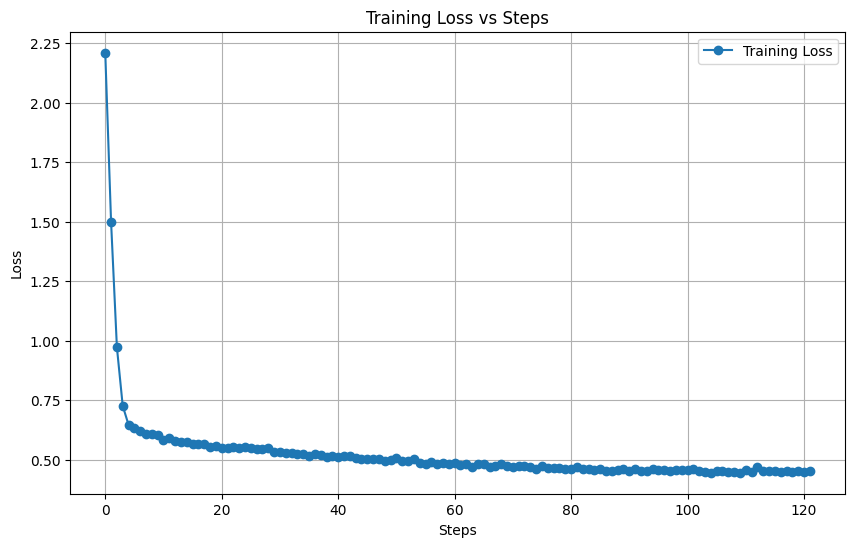

In [ ]:
import matplotlib.pyplot as plt

trainer_stats = trainer.train()

log_history = trainer.state.log_history

training_loss = [log['loss'] for log in log_history if 'loss' in log]
steps = [i for i in range(len(training_loss))]

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, label='Training Loss', marker='o')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss vs Steps')
plt.legend()
plt.grid()
plt.show()

In [ ]:
test_dataset = dataset['test']

sample_ques = test_dataset['question'][0]
sample_ans = test_dataset['answer'][0]

In [ ]:
FastLanguageModel.for_inference(model)
input_prompt = prompt.format(
        sample_ques,
        sample_ans, 
        "",
    )

print("Input Promt:\n", input_prompt)
inputs = tokenizer(
[
    input_prompt
], return_tensors = "pt").to("cuda")

input_shape = inputs['input_ids'].shape
input_token_len = input_shape[1]
outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)

response = tokenizer.batch_decode([outputs[0][input_token_len:]], skip_special_tokens=True)
response

Input Promt:
 You are a highly accurate mathematical evaluator. Your sole task is to determine whether a given answer to a math question is correct or not. Respond strictly with 'True' if the answer is correct, and 'False' if it is incorrect. Do not provide any additional text or explanations.

### Question:
The Parker family needs to leave the house by 5 pm for a dinner party. Mrs. Parker was waiting to get into the bathroom at 2:30 pm. Her oldest daughter used the bathroom for 45 minutes and her youngest daughter used the bathroom for another 30 minutes. Then her husband used it for 20 minutes. How much time will Mrs. Parker have to use the bathroom to leave on time?

### Answer:
205

### Output:




['True\n']

In [ ]:
from tqdm import tqdm
import pandas as pd

batch_size = 32 
predictions = []

tokenizer.padding_side = 'left'

total_predictions = len(test_dataset)

for start_idx in tqdm(range(0, total_predictions, batch_size)):
    end_idx = min(start_idx + batch_size, total_predictions)

    batch_questions = test_dataset["question"][start_idx:end_idx]
    batch_answers = test_dataset["answer"][start_idx:end_idx]

    input_prompts = [
        prompt.format(question, answer, "") for question, answer in zip(batch_questions, batch_answers)
    ]

    # Tokenize the input prompts
    inputs = tokenizer(
        input_prompts,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=max_seq_length 
    ).to(device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=64,
            use_cache=True,
            do_sample=False,
            num_beams=1,
            early_stopping=True
        )

    responses = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    for response in responses:
        model_prediction = response.split("### Output:")[-1].strip().split()[0].capitalize()
        if model_prediction not in ['True', 'False']:
            model_prediction = 'False'
        predictions.append(model_prediction)

results_df = pd.DataFrame({
    "ID": range(len(predictions)),
    "is_correct": predictions 
})

csv_file_path = "final.csv"

results_df.to_csv(csv_file_path, index=False)
print(f"Predictions saved to '{csv_file_path}'")


100%|██████████| 313/313 [06:01<00:00,  1.15s/it]

Predictions saved to 'final.csv'
